# Problem statement
  In this notebook we will train our  cleaned prosper Loan data on a Regularized Logistic Regression Model by applying severeal ML techniques in order to reach the best results
  Then we will compare the different parameters combinations in order to find the best results

## Importing the cleaned CSV file

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
link = 'https://drive.google.com/file/d/1HsRMSs2A120li2AZgvAtyqXHLaDAiSgn/view?usp=sharing'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('xclara.csv') 
 
df = pd.read_csv('xclara.csv')

## Importing the necessary libraries for the modelling

In [ ]:
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Splitting the Data into features (X) and labels (y) to be predicted 

In [ ]:
X= df.drop(columns=['ListingCreationDate', 'DateCreditPulled','FirstRecordedCreditLine','IncomeRange','LoanOriginationDate','target','ClosedDate'])
y = df['target']

## Splitting the Data into a training test (80% of the data) and a test set (20% of the data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

## Applying GridSearchCV 
The logistic regression usually dosen't have a lot of hyperparameters to be tuned. Therefore we used GridSearchCV without RandomizedSearchCV first to find the best parameters for our task

In [ ]:
# Creating the parameters Grid 
log_reg_grid = {"C" : [.001,0.0009,0.00095],
               "solver": ['newton-cg', 'lbfgs', 'liblinear'],
               "penalty" : ['l1','l2']}

In [ ]:
# Applying GridSearchCV on our data
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 20,
                         verbose=True) #verbose to have outputs of what happening with GridSearchCV
# Fit grid hyperparameter search for LogisticRegression
gs_log_reg.fit(X_train,y_train)

In [ ]:
# Extracting the best parameters from the GridSearchCV model
gs_log_reg.best_params_

{'C': 0.0009, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
# The test accuracy after using the best parameters
gs_log_reg.score(X_test,y_test)

0.967519494747696

## Scaling the data
Because the regularization penalty is comprised of the sum of the absolute value of the coefficients, It is a common approach to scale the data so the coefficients are all based on the same scale.

In [ ]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)


After scaling the features we will use them on our model containing the best hyperparameters

In [ ]:
clf = LogisticRegression(penalty='l2', C=0.0009 , solver='newton-cg')
clf.fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train_std, y_train))
print('Test accuracy:', clf.score(X_test_std, y_test))
print('')


Training accuracy: 0.6625743148533036
Test accuracy: 0.664948121415222



/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


As it is shown before, scaling the data affected the model training badly. So we will use the data without scaling it

## Visualizing the results in a Dataframe and a heatmap

In [ ]:
#Showing results
Index = ['Training Accuracy','Test Accuracy']
Cols = ['Logistic regression with scaled Data', 'Logistic regression without scaled Data']
results = pd.DataFrame(data=[[ 0.6625743148533036, 0.9690979103227157],[0.664948121415222, 0.967519494747696]],index=Index,columns=Cols)
results

,Logistic regression with scaled Data,Logistic regression without scaled Data
Training Accuracy,0.662574,0.969098
Test Accuracy,0.664948,0.967519


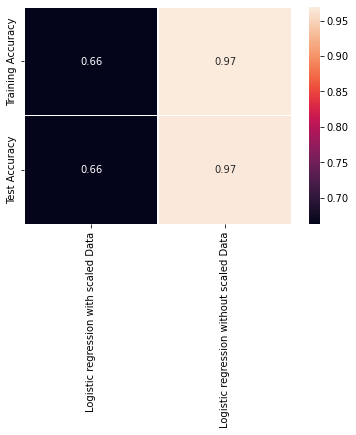

In [ ]:
sns.heatmap(results,annot=True,linewidths=.5);